# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Exploratory Data Analysis

## Loading the training and testing datasets

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Studying the data - info, shape, describe

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

## Data Visualizations

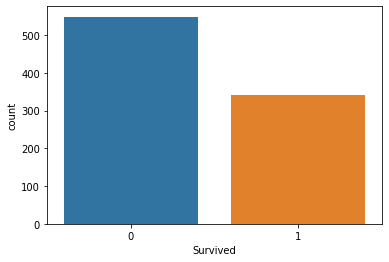

In [ ]:
sns.countplot(x='Survived', data=train);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


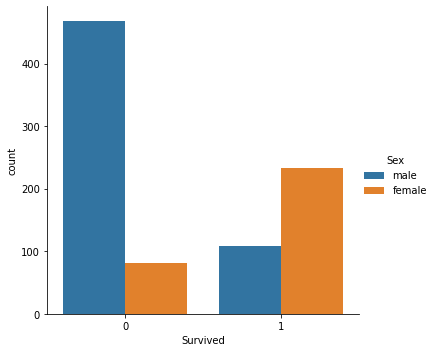

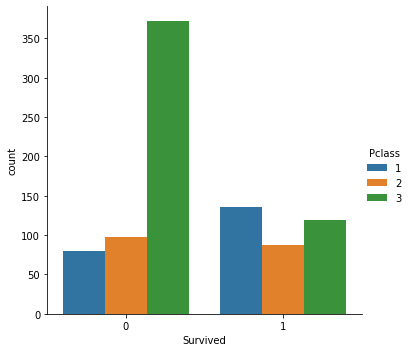

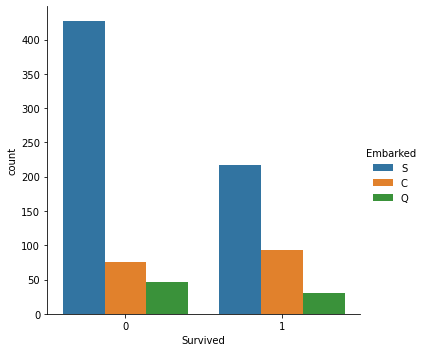

In [ ]:
sns.factorplot(x='Survived', hue='Sex', kind='count', data=train);
sns.factorplot(x='Survived', hue='Pclass', kind='count', data=train);
sns.factorplot(x='Survived', hue='Embarked', kind='count', data=train);

In [ ]:
# Percentages of women and men that survived
print(train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print(train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


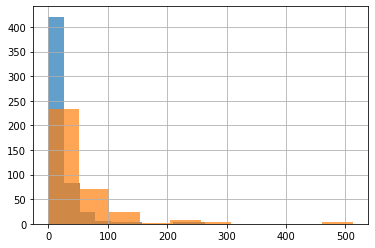

In [ ]:
train.groupby('Survived').Fare.hist(alpha=0.7);

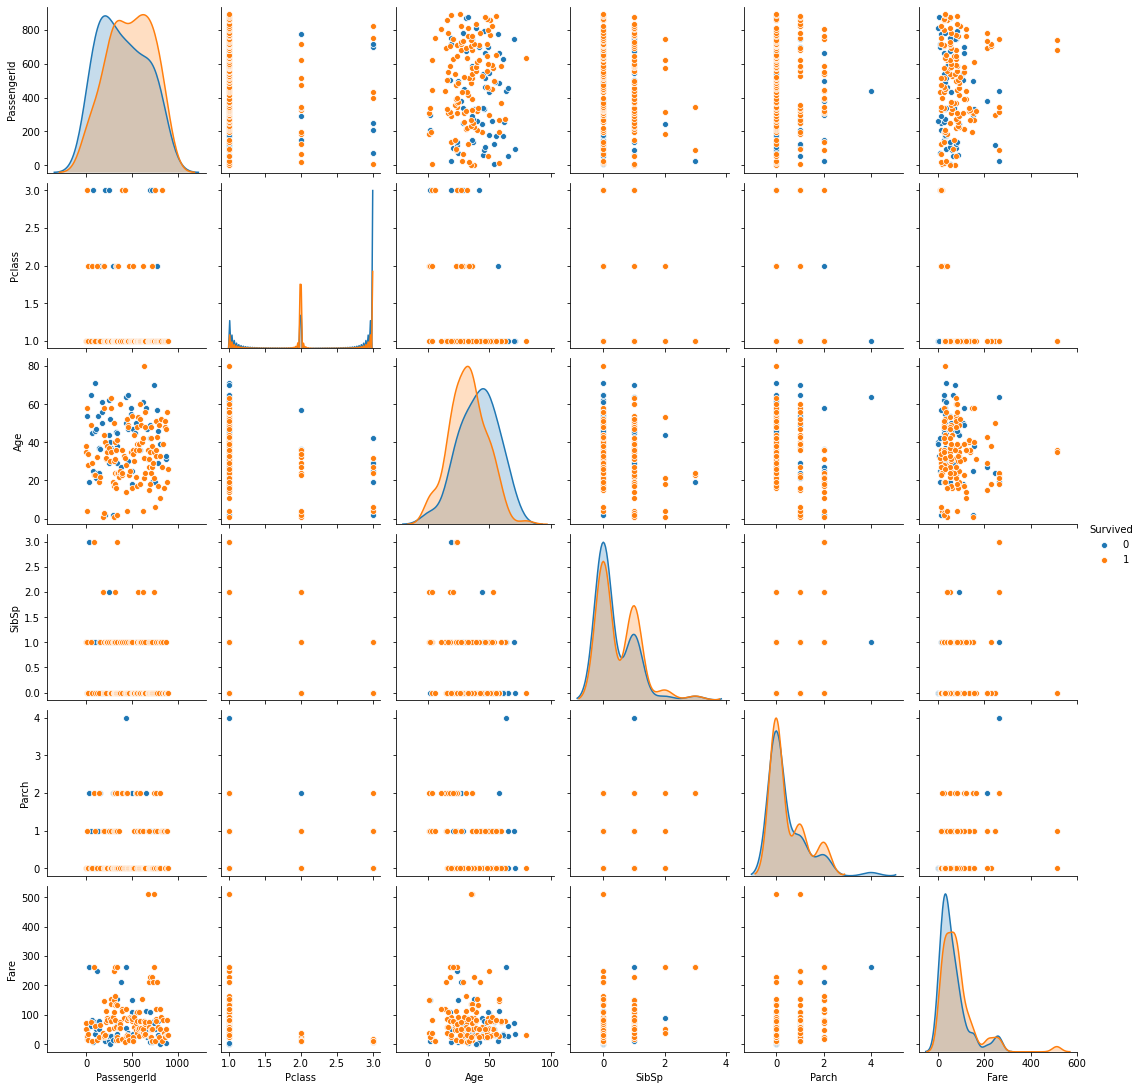

In [ ]:
train_drop = train.dropna()
sns.pairplot(train_drop, hue='Survived');

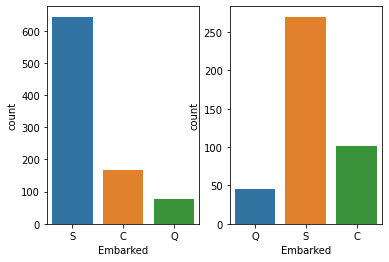

In [ ]:
fig, axs = plt.subplots(1,2)
sns.countplot(x='Embarked', data=train, ax=axs[0])
sns.countplot(x='Embarked', data=test, ax=axs[1]);

## Combining the datasets

In [ ]:
# Concatenate training and test sets
df = pd.concat([train, test])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Cleaning the data - Dealing with Null values

In [ ]:
# Handling null values for Fare
def remove_zero_fares(row):
    if row.Fare == 0:
        row.Fare = np.NaN
    return row
# Apply the function
df = df.apply(remove_zero_fares, axis=1)
df['Fare'] = df.Fare.fillna(df.Fare.median())

In [ ]:
# If person has cabin, there is expected to be some value. Else, the feature has a NaN value
df['Has_Cabin'] = ~df.Cabin.isnull()

In [ ]:
# Handling null values in Embarked - impute using mode
df['Embarked']=df.Embarked.fillna('S')

In [ ]:
# Removing age null values
df['Age'] = df.Age.fillna(df.Age.median())

In [ ]:
#Binning Age and fare -> Categorical features
categorical_age = pd.cut(df['Age'], 5)
categorical_fare = pd.qcut(df['Fare'], 4)
print(categorical_age.unique())
print(categorical_fare.unique())

[(16.136, 32.102], (32.102, 48.068], (48.068, 64.034], (0.0902, 16.136], (64.034, 80.0]]
Categories (5, interval[float64]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] <
                                    (48.068, 64.034] < (64.034, 80.0]]
[(3.17, 7.925], (31.275, 512.329], (7.925, 14.5], (14.5, 31.275]]
Categories (4, interval[float64]): [(3.17, 7.925] < (7.925, 14.5] < (14.5, 31.275] <
                                    (31.275, 512.329]]


In [ ]:
# Mapping Age
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4 ;
df['Age'] = df['Age'].astype(int)

# Mapping Fare
df.loc[ df['Fare'] <= 7.925, 'Fare'] = 0
df.loc[(df['Fare'] > 7.925) & (df['Fare'] <= 14.5), 'Fare'] = 1
df.loc[(df['Fare'] > 14.5) & (df['Fare'] <= 31.275), 'Fare'] = 2
df.loc[ df['Fare'] > 31.275, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

In [ ]:
df.Cabin.fillna('Unknown',inplace=True)
# Extract first letter
df['Cabin'] = df['Cabin'].map(lambda x : x[0])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,U,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,0,U,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,C,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,U,S,False


# Feature Engineering

In [ ]:
#New Feature
family_size = df['SibSp'] + df['Parch'] + 1
# Creation of four groups
df['Fam_type'] = pd.cut(family_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

In [ ]:
# Title Feature from Name
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
df['Title'] = df['Name'].apply(get_title)
# Substitute rare female titles
df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [ ]:
features_to_drop = ['Name', 'SibSp', 'Parch', 'Ticket']
df.drop(features_to_drop, axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Has_Cabin,Fam_type,Title
0,1,0.0,3,male,1,0,U,S,False,Small,Mr
1,2,1.0,1,female,2,3,C,C,True,Small,Mrs
2,3,1.0,3,female,1,0,U,S,False,Solo,Miss
3,4,1.0,1,female,2,3,C,S,True,Small,Mrs
4,5,0.0,3,male,2,1,U,S,False,Solo,Mr


# Encoding categorical features

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Has_Cabin,Fam_type,Title
0,1,0.0,3,male,1,0,U,S,False,Small,Mr
1,2,1.0,1,female,2,3,C,C,True,Small,Mrs
2,3,1.0,3,female,1,0,U,S,False,Solo,Miss
3,4,1.0,1,female,2,3,C,S,True,Small,Mrs
4,5,0.0,3,male,2,1,U,S,False,Solo,Mr


In [ ]:
categorical_features = ['Pclass', 'Sex', 'Fam_type', 'Title', 'Embarked', 'Cabin']
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Has_Cabin', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Fam_type_Small', 'Fam_type_Big',
       'Fam_type_Very big', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rev', 'Embarked_Q', 'Embarked_S', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U'],
      dtype='object')

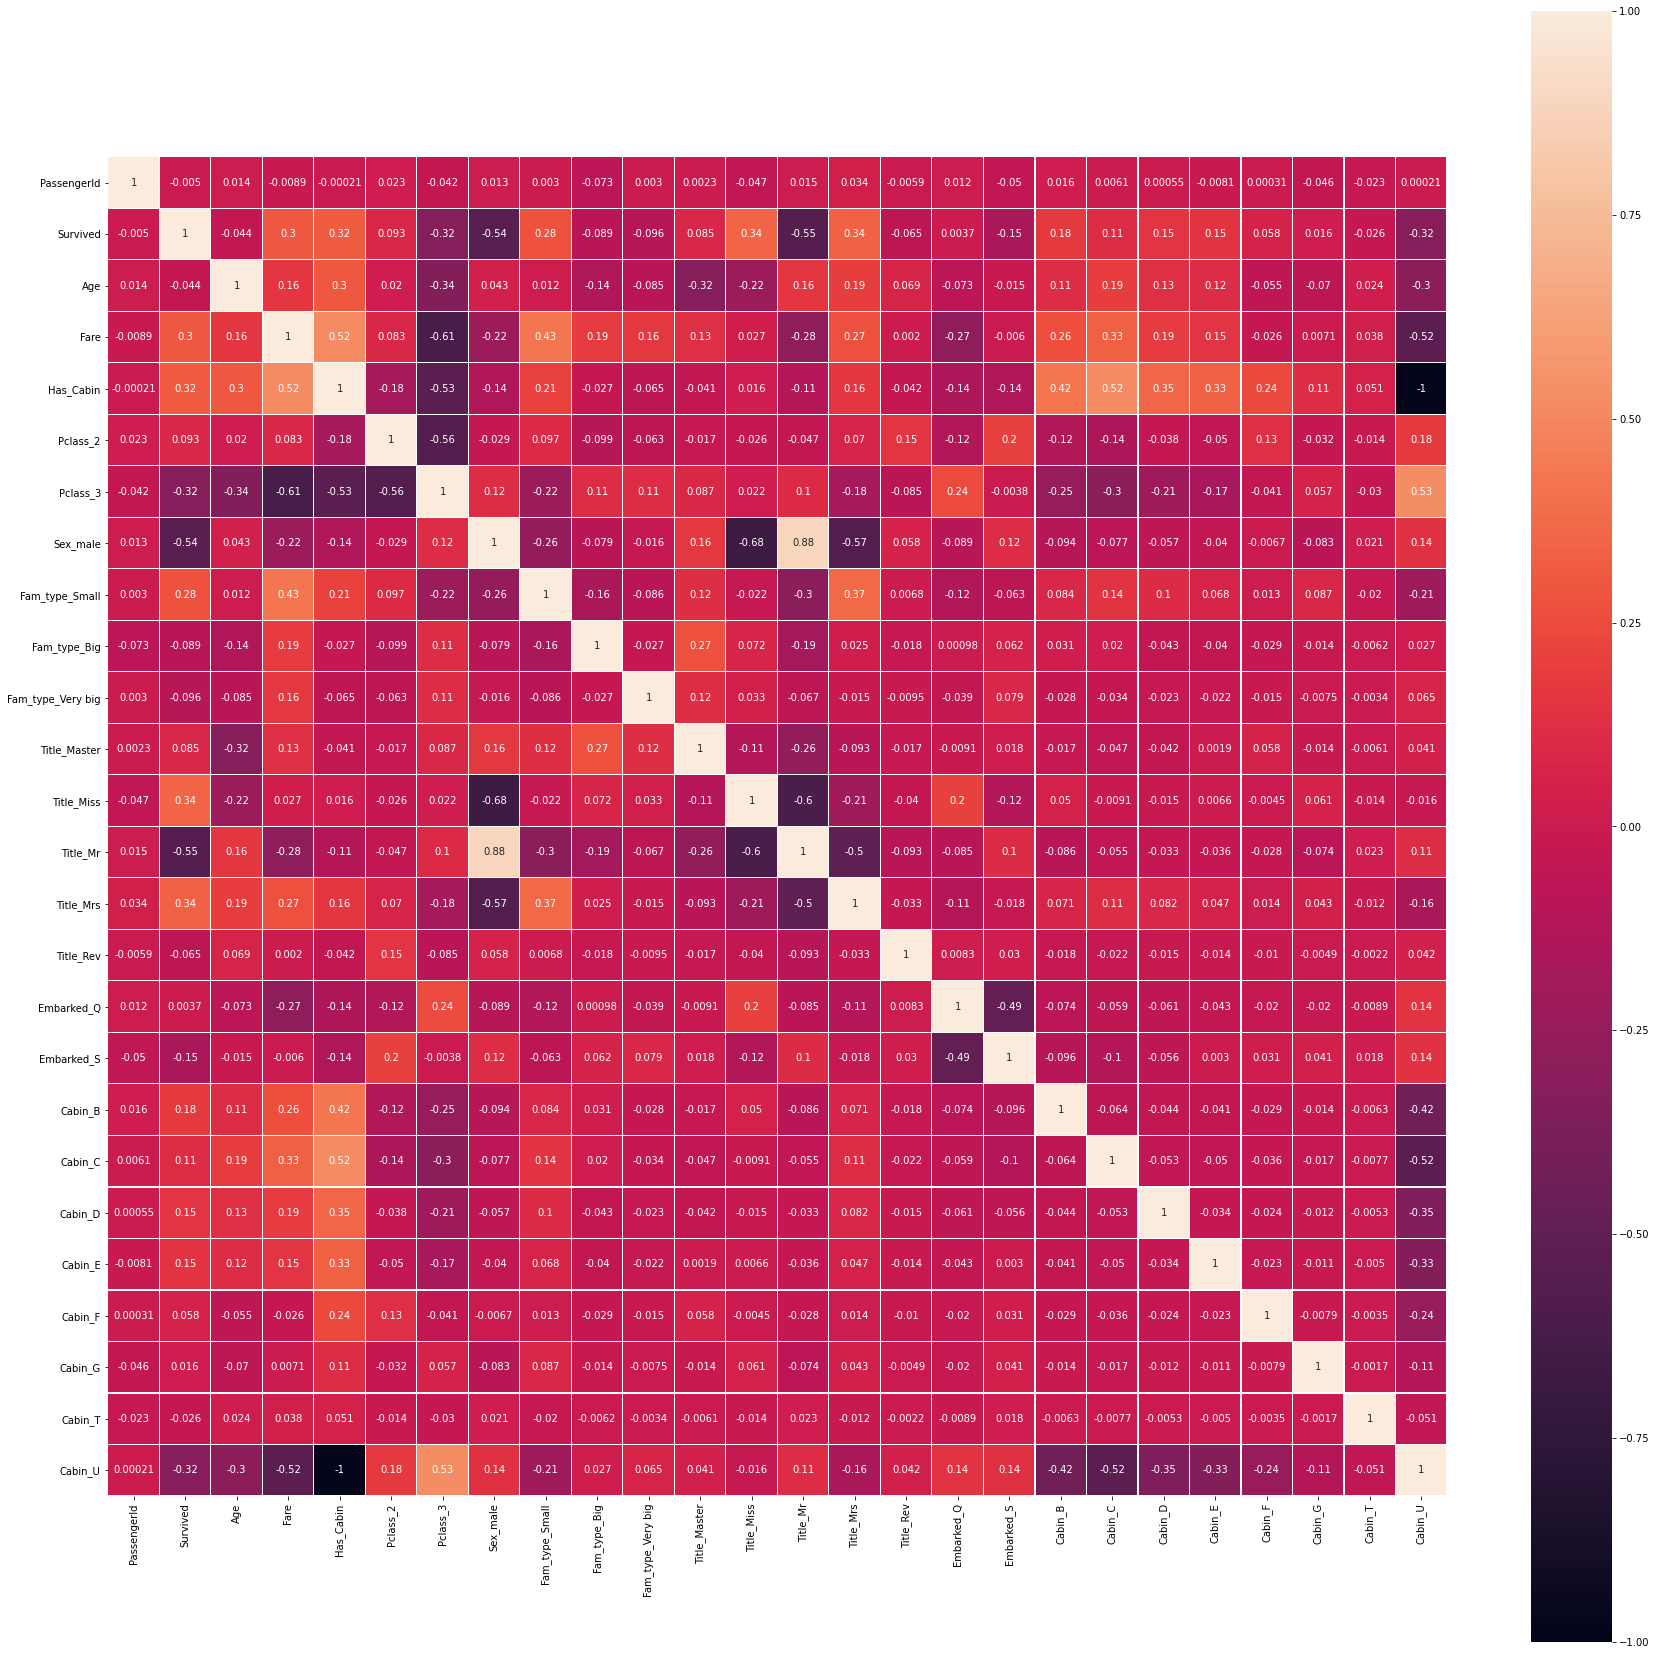

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [ ]:
df = df.drop(columns=['Sex_male', 'Has_Cabin'])
df.head()

,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Fam_type_Small,Fam_type_Big,Fam_type_Very big,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,2,1.0,2,3,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,1.0,2,3,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,5,0.0,2,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


# Getting X_train, y_train and X_test

In [ ]:
df_train = df.iloc[:891]
df_test = df.iloc[891:].drop(['Survived'], axis = 1)

In [ ]:
X_train = df_train.iloc[:, 2:].values
y_train = df_train.iloc[:, 1].values
X_test = df_test.iloc[:, 1:]

# Hyperparameter tuning

## Decision Tree

In [ ]:
# Decision Tree - Best score till now, with tuned hyperparameters
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
parameters = {'criterion' : ['gini', 'entropy'], 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth' : list(range(2, 16))}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.28 %
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 12, 'min_samples_split': 2}


In [ ]:
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_leaf_nodes = 12, min_samples_split = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test).astype(int)
df_test['Survived'] = y_pred
df_test[['PassengerId', 'Survived']].to_csv('dc.csv', index=False)

## SVM Classifier

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}, 
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.27 %
Best Parameters: {'C': 1, 'gamma': 0.2, 'kernel': 'poly'}


## Random Forest

In [ ]:
classifier = RandomForestClassifier(max_depth = 5,                                
                                min_samples_split =10,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 16)
parameter_grid = {'n_estimators' : [13, 14, 15, 16, 17],
                  'criterion' : ['gini', 'entropy'],
                  'max_features' : ['auto', 'sqrt', 'log2', None]
                 }

grid_search = GridSearchCV(classifier, param_grid=parameter_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8328089887640449
Best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 15}


In [ ]:
classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = 15, max_features = 'sqrt', max_depth = 5, max_leaf_nodes = 16, min_samples_split = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test).astype(int)
df_test['Survived'] = y_pred
df_test[['PassengerId', 'Survived']].to_csv('rf.csv', index=False)

## KNN

In [ ]:
classifier = KNeighborsClassifier()
parameters = {
    'leaf_size': list(range(1,50)),
    'n_neighbors': list(range(1, 30)),
    'p': [1, 2]
}
grid_search = grid_search = GridSearchCV(estimator=classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.72 %
Best Parameters: {'leaf_size': 4, 'n_neighbors': 5, 'p': 1}


## Logistic Regression

In [ ]:
classifier = LogisticRegression()
parameters = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}
grid_search = GridSearchCV(estimator=classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.48 %
Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


## Naive Bayes - Gaussian

In [ ]:
classifier = GaussianNB()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Std : {:.2f} %".format(accuracies.std()*100))

Accuracy : 77.45 %
Std : 2.91 %


## XGBClassifier

In [ ]:
# using xgboost
classifier = XGBClassifier()
parameters = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
grid_search = GridSearchCV(estimator=classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

# Using CatBoost - No tuning required, no encoding required

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(custom_loss=['Accuracy'], random_seed=42, logging_level='Silent')
categorical_features_indices = np.where(df_train[features].dtypes != np.float)[0]
classifier.fit(X_train, y_train, cat_features=categorical_features_indices)

In [ ]:
from catboost import Pool, cv
cv_dataset = Pool(data=X_train, label=y_train, cat_features=categorical_features_indices)

In [ ]:
params = {"iterations": 100, "depth": 2, "loss_function": "Logloss", "verbose": 200, 'eval_metric':'Accuracy'}
scores = cv(cv_dataset, params, fold_count=4, shuffle=True, stratified=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7916228	test: 0.7901242	best: 0.7901242 (0)	total: 151ms	remaining: 15s
99:	learn: 0.8271600	test: 0.8316499	best: 0.8327760 (53)	total: 13.7s	remaining: 0us


In [ ]:
y_pred = classifier.predict(X_test).astype(int)
df_test['Survived'] = y_pred
df_test[['PassengerId', 'Survived']].to_csv('catboost.csv', index=False)

# Cross Validation Score Template

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Std : {:.2f} %".format(accuracies.std()*100))

# Prediction Template

In [ ]:
classifier = RandomForestClassifier(criterion = 'gini', max_features = None, n_estimators = 15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test).astype(int)
df_test['Survived'] = y_pred
df_test[['PassengerId', 'Survived']].to_csv('rf.csv', index=False)